<a href="https://colab.research.google.com/github/indhujasreekumar1999-lab/Implementing-and-Analyzing-K-means-clustering-from-scratch/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

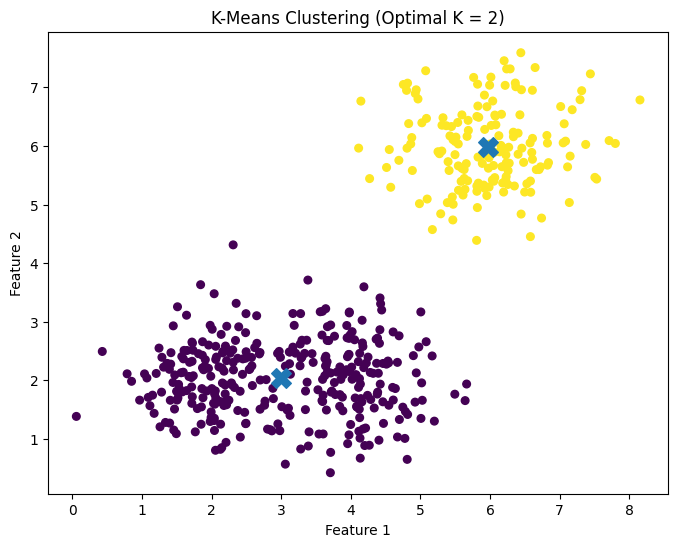

K	SSE		Silhouette Score
2	751.04	0.6941
3	398.67	0.5813
4	343.34	0.4591
5	310.96	0.4566
6	251.87	0.3331
7	225.18	0.3553
8	188.7	0.3533
9	174.65	0.3442
10	160.58	0.3576

Optimal K Selected: 2

Final Centroids:
 [[2.99862214 2.04197817]
 [5.97794786 5.98109095]]


In [1]:
# Implementing K-Means Clustering from Scratch


import numpy as np
import matplotlib.pyplot as plt


# 1. Generate Synthetic Dataset (500 points)

np.random.seed(42)

cluster1 = np.random.normal(loc=[2, 2], scale=0.6, size=(170, 2))
cluster2 = np.random.normal(loc=[6, 6], scale=0.7, size=(165, 2))
cluster3 = np.random.normal(loc=[4, 2], scale=0.65, size=(165, 2))

X = np.vstack((cluster1, cluster2, cluster3))


# 2. K-Means Algorithm from Scratch

def kmeans_from_scratch(X, K, max_iters=100, tolerance=1e-4):
    n_samples = X.shape[0]

    # Random centroid initialization
    centroids = X[np.random.choice(n_samples, K, replace=False)]

    for _ in range(max_iters):
        # Distance calculation
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

        # Cluster assignment
        labels = np.argmin(distances, axis=1)

        # Centroid update
        new_centroids = np.array([X[labels == k].mean(axis=0) for k in range(K)])

        # Convergence check
        if np.all(np.abs(new_centroids - centroids) < tolerance):
            break

        centroids = new_centroids

    return labels, centroids


# 3. SSE Calculation (Elbow Method)

def calculate_sse(X, labels, centroids):
    sse = 0
    for k in range(len(centroids)):
        sse += np.sum((X[labels == k] - centroids[k]) ** 2)
    return sse


# 4. Silhouette Score from Scratch

def silhouette_score_scratch(X, labels):
    n = X.shape[0]
    unique_labels = np.unique(labels)
    scores = []

    for i in range(n):
        same_cluster = X[labels == labels[i]]
        other_clusters = [X[labels == l] for l in unique_labels if l != labels[i]]

        a = np.mean(np.linalg.norm(same_cluster - X[i], axis=1))
        b = min(np.mean(np.linalg.norm(cluster - X[i], axis=1)) for cluster in other_clusters)

        scores.append((b - a) / max(a, b))

    return np.mean(scores)


# 5. Run Elbow & Silhouette for K = 2 to 10

sse_values = []
silhouette_values = []
K_range = range(2, 11)

for K in K_range:
    labels, centroids = kmeans_from_scratch(X, K)
    sse_values.append(calculate_sse(X, labels, centroids))
    silhouette_values.append(silhouette_score_scratch(X, labels))


# 6. Select Optimal K

optimal_k = K_range[np.argmax(silhouette_values)]
final_labels, final_centroids = kmeans_from_scratch(X, optimal_k)

# 7. Visualization

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=final_labels, s=30)
plt.scatter(final_centroids[:, 0], final_centroids[:, 1], s=200, marker='X')
plt.title(f"K-Means Clustering (Optimal K = {optimal_k})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.savefig("kmeans_clustering_output.jpg")
plt.show()

# 8. Print Output Values

print("K\tSSE\t\tSilhouette Score")
for k, sse, sil in zip(K_range, sse_values, silhouette_values):
    print(f"{k}\t{round(sse,2)}\t{round(sil,4)}")

print("\nOptimal K Selected:", optimal_k)
print("\nFinal Centroids:\n", final_centroids)